In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/content/drive/MyDrive/dnnface'

os.chdir(WORKING_DIRECTORY)

In [3]:
!ls

 data  'Final-Face Detection Notebook.ipynb'   LICENSE	 README.md
 file   haarcascades			       model


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def detectDNN(imgpath):
    modelFile = "./model/res10_300x300_ssd_iter_140000.caffemodel"
    configFile = "./model/deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()
    #[,frame,number of detection,[classid,class score,conf,x,y,h,w]]
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.2:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            frame[startY:endY,startX:endX] = cv2.GaussianBlur(frame[startY:endY,startX:endX],(15,15),cv2.BORDER_DEFAULT)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 3)

    # show the output image
    plt.imshow( frame)
    plt.show()

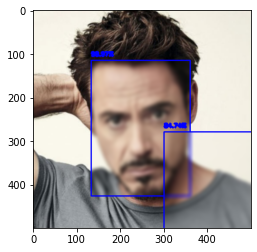

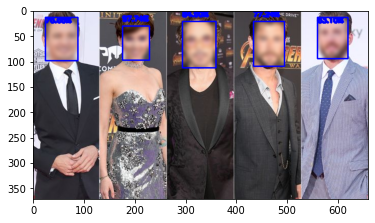

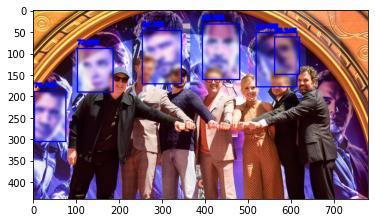

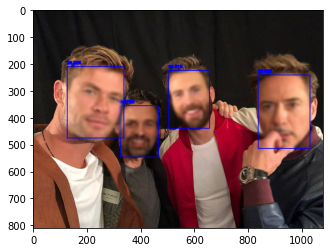

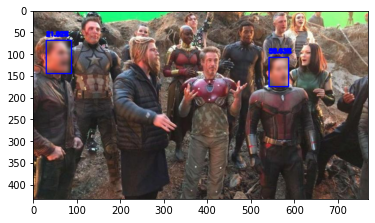

In [27]:
detectDNN('./data/tony.jpg')
detectDNN('./data/group.jpg')
detectDNN('./data/groupsmall.jpg')
detectDNN('./data/groupbig.jpg')
detectDNN('./data/groupangle.jpeg')

In [53]:
def objectdetectDNN(imgpath):

  CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
  COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
  modelFile = "./model/MobileNetSSD_deploy.caffemodel"
  configFile = "./model/MobileNetSSD_deploy.prototxt.txt"
  net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
  frame = cv2.imread(imgpath)
  #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

  #image = cv2.imread(args["image"])
  (h, w) = frame.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.007843, (300, 300), 127.5)


  net.setInput(blob)
  detections = net.forward()
  for i in np.arange(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	  confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	  if confidence > 0.5:
		# extract the index of the class label from the `detections`,
		# then compute the (x, y)-coordinates of the bounding box for
		# the object
		  idx = int(detections[0, 0, i, 1])
		  box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		  (startX, startY, endX, endY) = box.astype("int")

		# display the prediction
		  label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		  print("[INFO] {}".format(label))
		  cv2.rectangle(frame, (startX, startY), (endX, endY),
			  COLORS[idx], 2)
		  y = startY - 15 if startY - 15 > 15 else startY + 15
		  cv2.putText(frame, label, (startX, y),
			  cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
  plt.imshow( frame)
  plt.show()



[INFO] car: 99.93%
[INFO] car: 97.42%


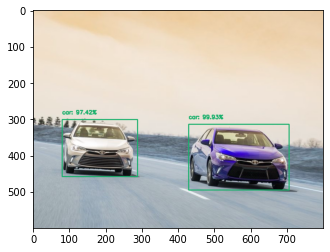

[INFO] aeroplane: 99.36%


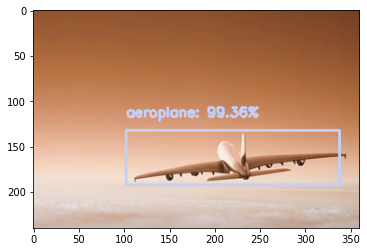

[INFO] horse: 99.90%
[INFO] person: 56.05%
[INFO] pottedplant: 97.92%


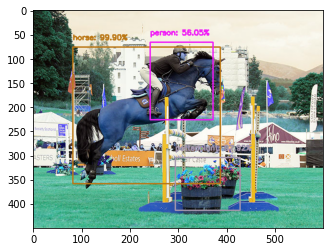

[INFO] bottle: 100.00%


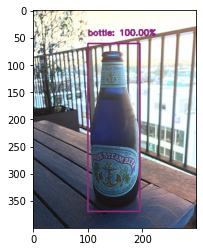

[INFO] car: 99.43%
[INFO] cat: 57.60%
[INFO] dog: 61.78%
[INFO] horse: 99.91%
[INFO] person: 88.44%


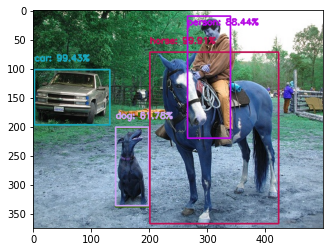

In [55]:
objectdetectDNN('./data/example_01.jpg')
objectdetectDNN('./data/example_02.jpg')
objectdetectDNN('./data/example_03.jpg')
objectdetectDNN('./data/example_04.jpg')
objectdetectDNN('./data/example_05.jpg')

[INFO] person: 99.91%


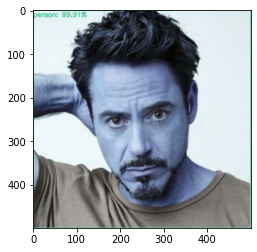

[INFO] person: 99.66%
[INFO] person: 98.67%
[INFO] person: 98.37%
[INFO] person: 98.08%
[INFO] person: 97.86%


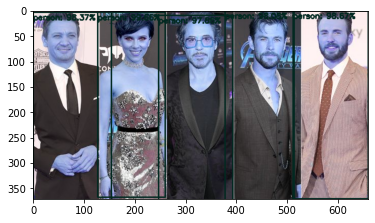

[INFO] person: 99.44%
[INFO] person: 92.41%
[INFO] person: 90.44%
[INFO] person: 90.20%
[INFO] person: 88.92%
[INFO] person: 87.92%
[INFO] person: 57.09%


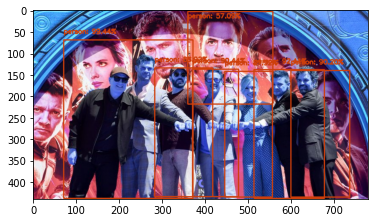

[INFO] person: 99.20%
[INFO] person: 99.19%
[INFO] person: 98.87%
[INFO] person: 96.18%


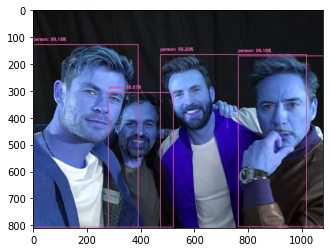

[INFO] person: 99.43%
[INFO] person: 98.22%
[INFO] person: 97.30%
[INFO] person: 62.20%


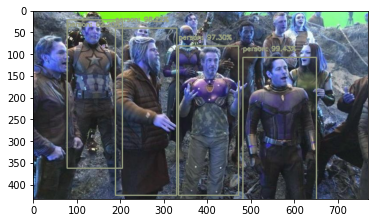

In [56]:
objectdetectDNN('./data/tony.jpg')
objectdetectDNN('./data/group.jpg')
objectdetectDNN('./data/groupsmall.jpg')
objectdetectDNN('./data/groupbig.jpg')
objectdetectDNN('./data/groupangle.jpeg')

In [ ]:
import numpy as np
import argparse
import cv2

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-p", "--prototxt", required=True,
	help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True,
	help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.2,
	help="minimum probability to filter weak detections")
args = vars(ap.parse_args())

# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in np.arange(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
		# extract the index of the class label from the `detections`,
		# then compute the (x, y)-coordinates of the bounding box for
		# the object
		idx = int(detections[0, 0, i, 1])
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# display the prediction
		label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		print("[INFO] {}".format(label))
		cv2.rectangle(image, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(image, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)


In [28]:
import cv2
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt
def detectDlib(imgpath):
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_detect = dlib.get_frontal_face_detector()
    rects = face_detect(gray, 1)
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)
    plt.imshow(frame)
    plt.show()

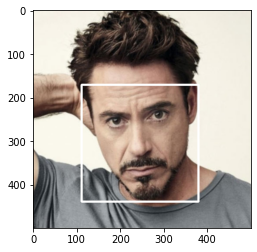

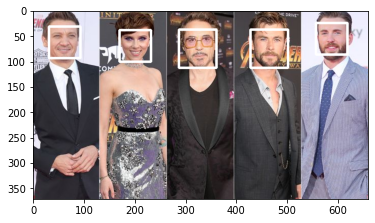

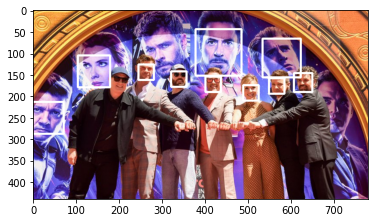

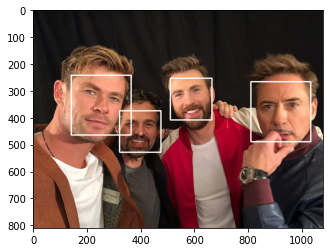

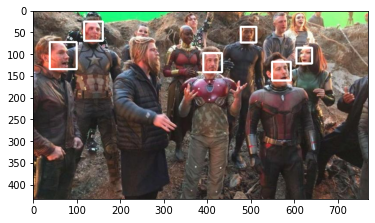

In [29]:
detectDlib('./data/tony.jpg')
detectDlib('./data/group.jpg')
detectDlib('./data/groupsmall.jpg')
detectDlib('./data/groupbig.jpg')
detectDlib('./data/groupangle.jpeg')

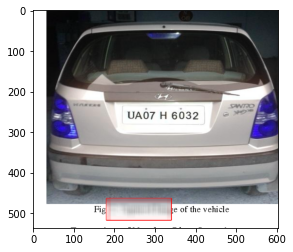

In [76]:
import cv2
import numpy as np



faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

img = cv2.imread('data/car3.png')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(img,scaleFactor=1.2,
    minNeighbors = 5, minSize=(25,25))

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    plate = img[y: y+h, x:x+w]
    plate = cv2.blur(plate,ksize=(20,20))
    # put the blurred plate into the original image
    img[y: y+h, x:x+w] = plate
plt.imshow(img)
plt.show()
#cv2.imshow('plates',gray)
#if cv2.waitKey(0) & 0xFF == ord('q'):
   # cv2.destroyAllWindows()

In [60]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')


In [81]:
img = cv2.imread("data/cars.jpg")

In [82]:
detections = face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors = 5)

In [83]:
print(detections)

[[ 25  67  72  24]
 [224  89  71  24]]


67
89


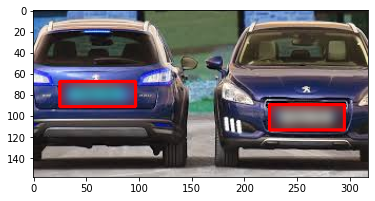

In [85]:
for face in detections:
  x,y,w,h = face
  confidence = face[1]
  print(confidence)
  img[y:y+h,x:x+w] = cv2.GaussianBlur(img[y:y+h,x:x+w],(15,15),cv2.BORDER_DEFAULT)
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(img)
plt.show()

In [ ]:
for image_path in image_paths:
 predict_image_pil = Image.open(image_path).convert('L')
 predict_image = np.array(predict_image_pil, 'uint8')
 faces = faceCascade.detectMultiScale(predict_image)
 for (x, y, w, h) in faces:
    nbr_predicted, conf = recognizer.predict(predict_image[y: y + h, x: x + w])
    nbr_actual = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
    if nbr_actual == nbr_predicted:
        print "{} is Correctly Recognized with confidence {}".format(nbr_actual, conf)
    else:
        print "{} is Incorrect Recognized as {}".format(nbr_actual,         nbr_predicted)
    cv2.imshow("Recognizing Face", predict_image[y: y + h, x: x + w])